In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.shape


(267, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
df.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [7]:
df.columns = df.columns.str.strip()


In [8]:
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\ISHAN GAIN\AppData\Local\Temp\ipykernel_22524\3386729631.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.isnull().sum()


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

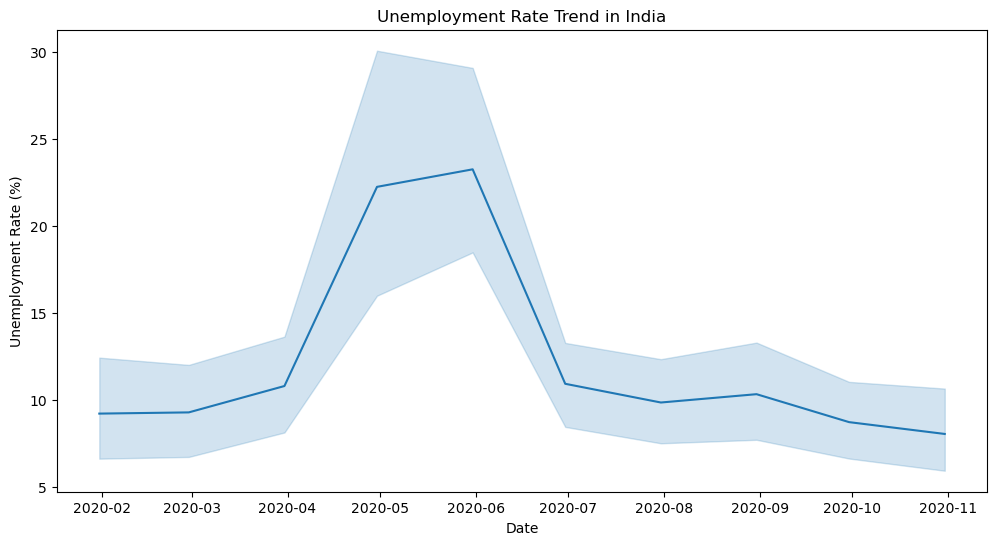

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title("Unemployment Rate Trend in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [11]:
covid_start = '2020-03-01'


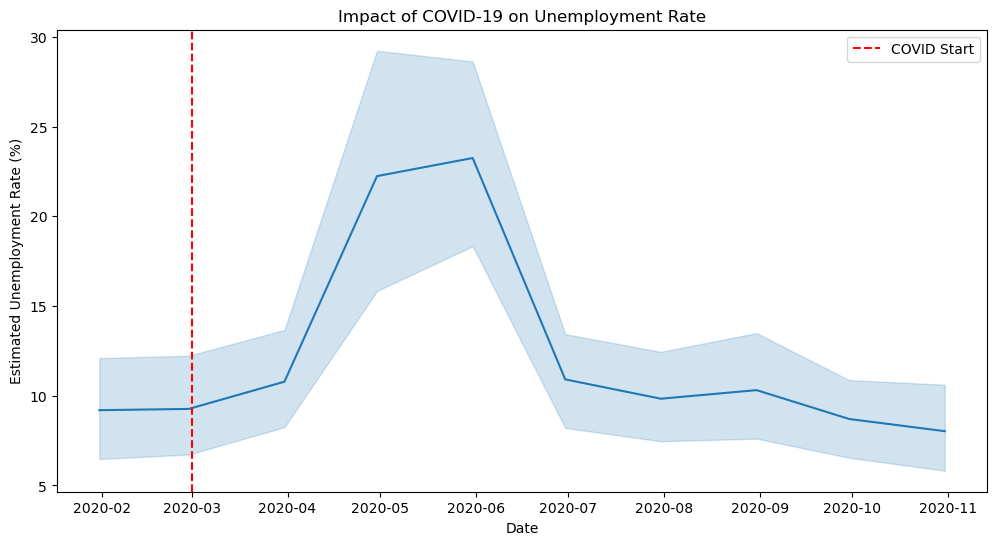

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.axvline(pd.to_datetime(covid_start), color='red', linestyle='--', label='COVID Start')
plt.legend()
plt.title("Impact of COVID-19 on Unemployment Rate")
plt.show()


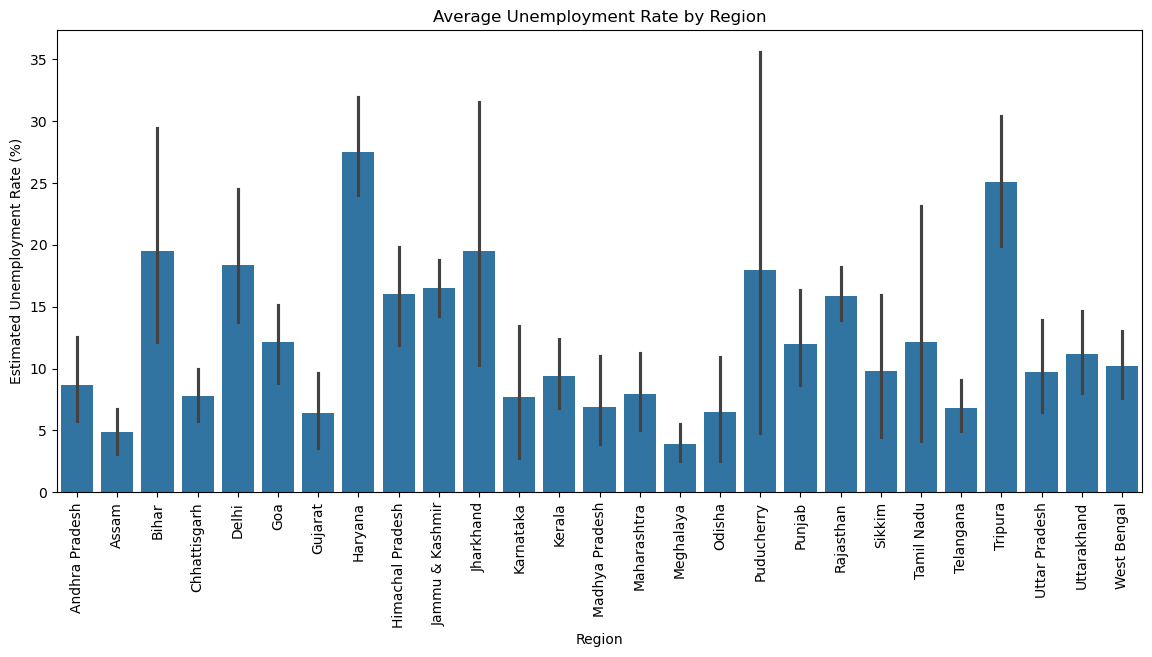

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(
    x='Region',
    y='Estimated Unemployment Rate (%)',
    data=df,
    estimator=np.mean
)
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.show()


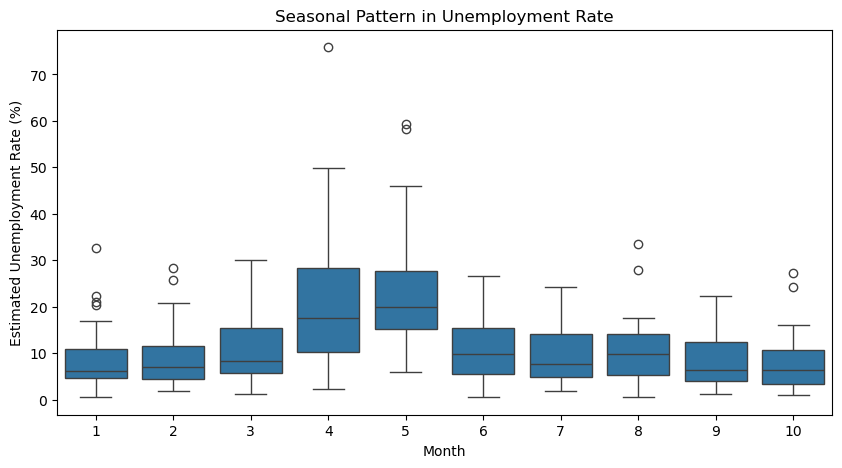

In [14]:
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='Estimated Unemployment Rate (%)', data=df)
plt.title("Seasonal Pattern in Unemployment Rate")
plt.show()


In [15]:
df_area = pd.read_csv("Unemployment in India.csv")


In [17]:
print(df_area.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [18]:
df_area.columns = df_area.columns.str.strip()


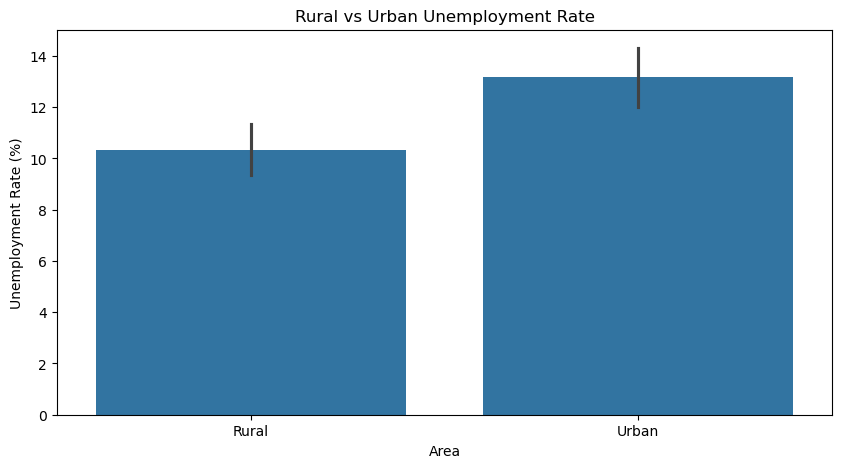

In [19]:


plt.figure(figsize=(10,5))
sns.barplot(
    x='Area',
    y='Estimated Unemployment Rate (%)',
    data=df_area,
    estimator='mean'
)
plt.title("Rural vs Urban Unemployment Rate")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()


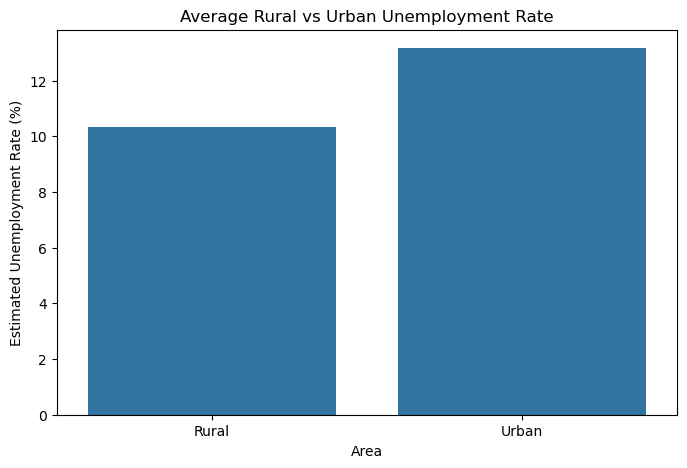

In [20]:
area_avg = df_area.groupby('Area')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    x='Area',
    y='Estimated Unemployment Rate (%)',
    data=area_avg
)
plt.title("Average Rural vs Urban Unemployment Rate")
plt.show()


In [21]:
import pickle

with open("unemployment_cleaned.pkl", "wb") as file:
    pickle.dump(df, file)

print("Pickle file created successfully")


Pickle file created successfully


In [22]:
with open("unemployment_cleaned.pkl", "rb") as file:
    df_loaded = pickle.load(file)

df_loaded.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5
